In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import normalized_mutual_info_score
from joblib import load
from joblib import dump

In [2]:
top_5_feature_names = ['m_bb', 'm_wwbb', 'm_wbb', 'm_jjj', 'm_jlv']

In [3]:
X, y = load('../../../preprocessing/clustering_data.joblib')
X, _, y, _ = train_test_split(X, y, train_size=0.001, stratify=y, random_state=42)

In [4]:
X_top_5 = X[top_5_feature_names]

In [5]:
pca = PCA(n_components=3)
X_top_5 = pca.fit_transform(X_top_5)
X_top_5_df = pd.DataFrame(X_top_5, columns=['Component 1', 'Component 2', 'Component 3'])

In [6]:
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio

array([0.5698167 , 0.19029378, 0.14908575])

In [7]:
sum(explained_variance_ratio)

0.9091962345452059

In [8]:
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
cumulative_explained_variance

array([0.5698167 , 0.76011049, 0.90919623])

In [9]:
def visualize_clustering(labels, data, n_clusters, alg_name):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    for c in np.unique(labels):
        elems = data[labels == c]
        ax.scatter(elems.iloc[:, 0], elems.iloc[:, 1], elems.iloc[:, 2], label=f'Cluster {c}')

    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.set_zlabel('Component 3')
    ax.set_title('{} {} clusters'.format(alg_name, n_clusters))
    ax.legend()
    plt.show()

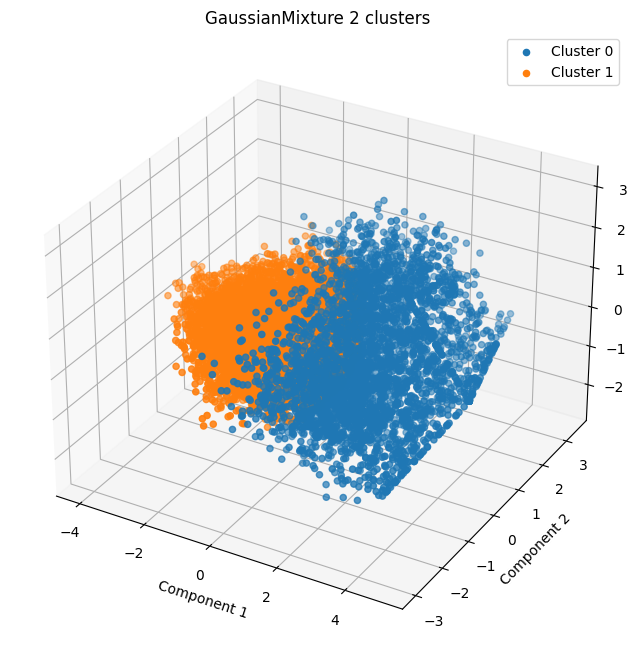

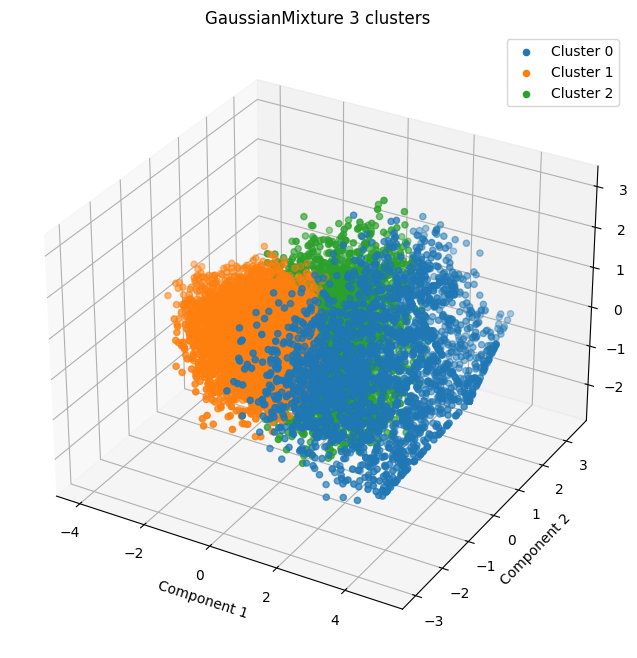

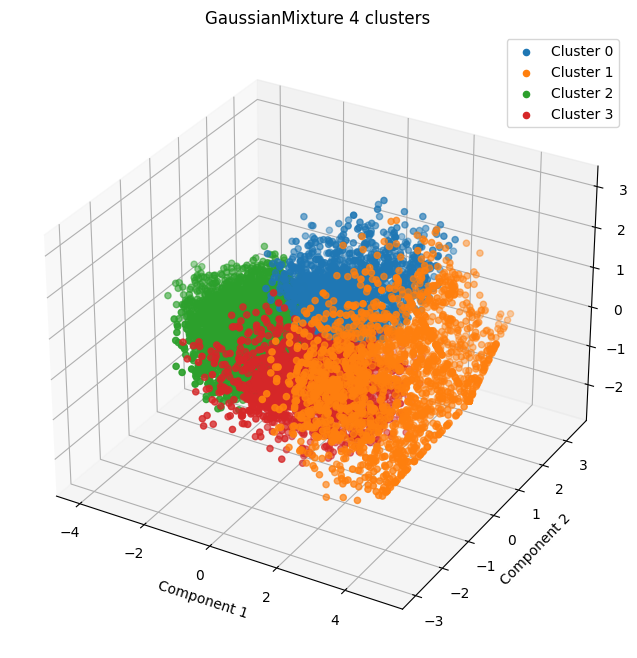

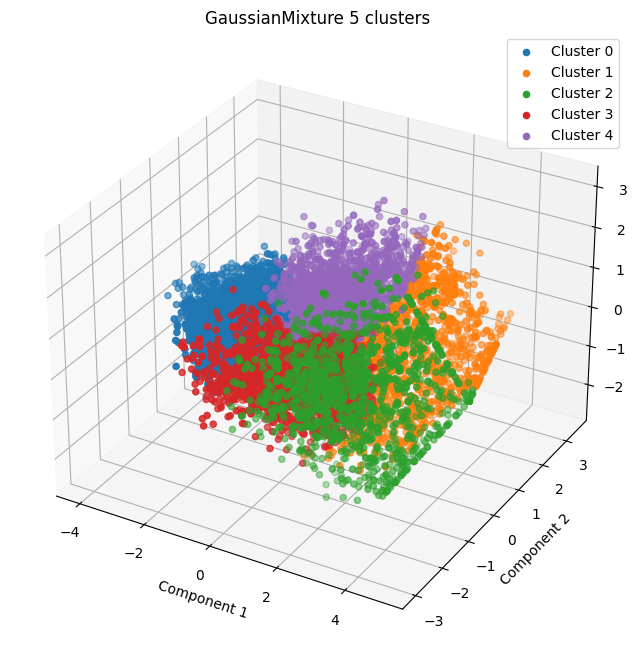

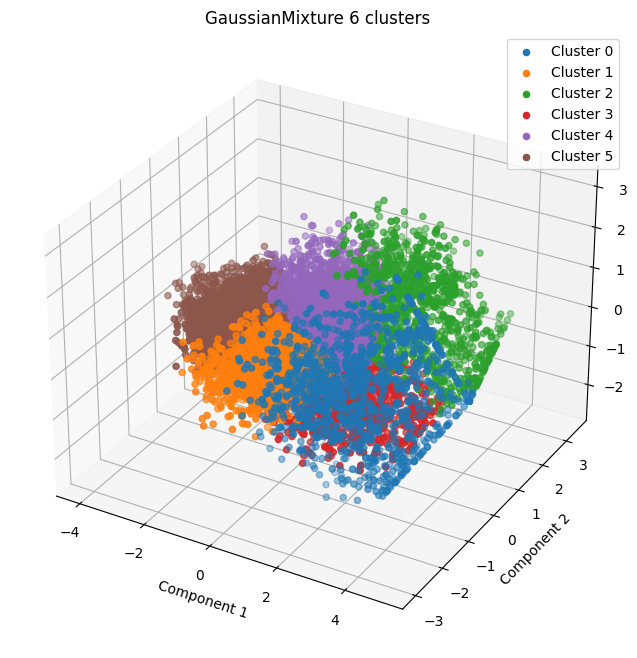

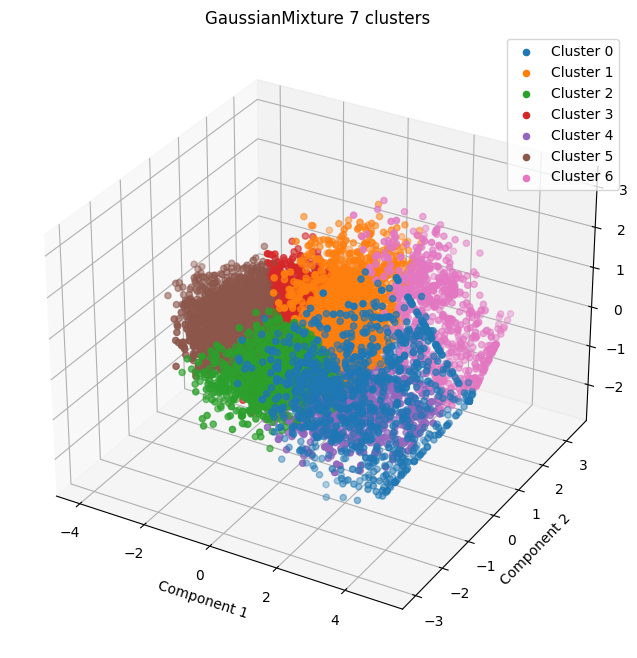

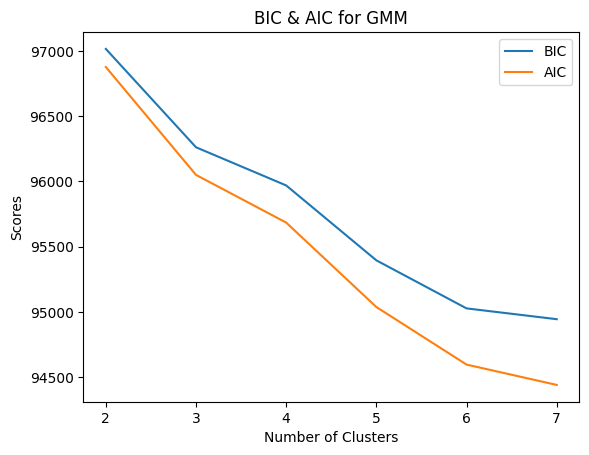

Best Silhouette Score: 0.40407201737277565


In [10]:
bic_values = []
aic_values = []
silhouette_scores_gmm = []
best_gmm_model = None
best_gmm_silhouette = -1

for n_clusters in range(2, 8): 
    gmm = GaussianMixture(n_components=n_clusters)
    gmm.fit(X_top_5)
    
    labels = gmm.predict(X_top_5)
    
    visualize_clustering(labels, X_top_5_df, n_clusters,"GaussianMixture")
    
    bic_values.append(gmm.bic(X_top_5))
    aic_values.append(gmm.aic(X_top_5))
    
    sil_score = silhouette_score(X_top_5, labels)
    silhouette_scores_gmm.append(sil_score)
    
    if sil_score > best_gmm_silhouette:
        best_gmm_silhouette = sil_score
        best_gmm_model = gmm

plt.figure()
plt.plot(range(2, 8), bic_values, label='BIC')
plt.plot(range(2, 8), aic_values, label='AIC')
plt.xlabel('Number of Clusters')
plt.ylabel('Scores')
plt.title('BIC & AIC for GMM')
plt.legend()
plt.show()

print("Best Silhouette Score:", best_gmm_silhouette)

In [11]:
bic_values

[97016.38854795563,
 96262.08632847901,
 95969.31940149778,
 95394.82047707189,
 95026.34951928542,
 94943.4933863437]

In [12]:
aic_values

[96877.5811874718,
 96050.22246247738,
 95684.39902997833,
 95036.84360003464,
 94595.31613673037,
 94439.40349827085]

In [13]:
silhouette_scores_gmm

[0.40407201737277565,
 0.27793931755001877,
 0.28117857727174245,
 0.25587679000667624,
 0.24996204983914835,
 0.2419294679138526]

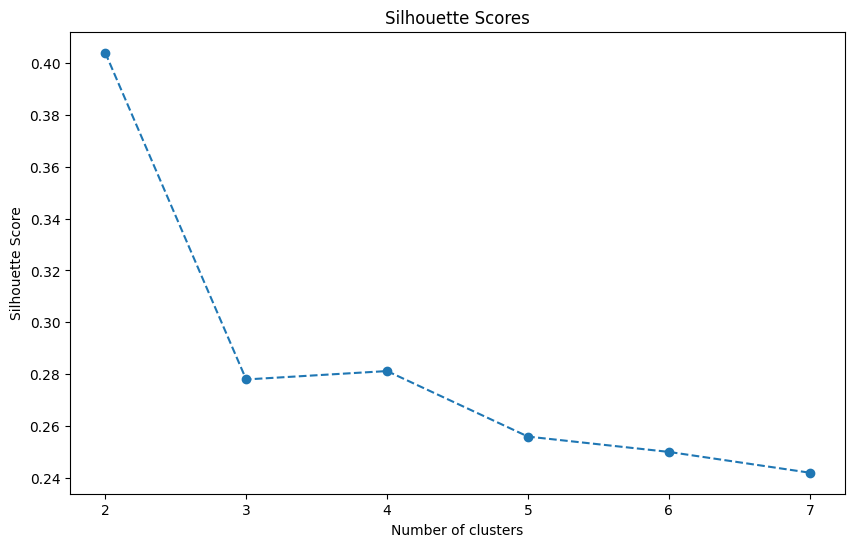

In [14]:
plt.figure(figsize=(10,6))
plt.plot(range(2, 8), silhouette_scores_gmm, marker='o', linestyle='--')
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [15]:
gmm = GaussianMixture(n_components=2)
y_gmm = gmm.fit_predict(X_top_5)

ari = adjusted_rand_score(y, y_gmm)
nmi = normalized_mutual_info_score(y, y_gmm)
silhouette = silhouette_score(X_top_5, y_gmm)

print("Adjusted Rand Index:", ari)
print("Normalized Mutual Information:", nmi)

Adjusted Rand Index: 0.015533695769814688
Normalized Mutual Information: 0.009679067376613715


In [17]:
dump(gmm,'gmm.joblib')

['gmm.joblib']